In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import os
import seaborn as sns
from proj1_helpers import *

SEED = 4

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
#its my datapath
DATA_TRAIN_PATH = r'C:/Users/soria/Google Drive/Machine Learning/project1/data/train.csv' # TODO: download train data and supply path here 

DATA_TEST_PATH = r'C:/Users/soria/Google Drive/Machine Learning/project1/data/test.csv' # TODO: download test data and supply path here 

#DATA_TRAIN_PATH = r'C:\Users\Tomas\GitHub\ML_course\projects\project1\data\train1.csv\train.csv' # TODO: download train data and supply path here 
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)
print(y.shape)
print(tx.shape)
print(ids.shape)

(250000,)
(250000, 30)
(250000,)


In [3]:
#DATA_TEST_PATH = r'C:\Users\Tomas\GitHub\ML_course\projects\project1\data\test1.csv\test.csv' # TODO: download test data and supply path here 
_, tx_test, ids_test = load_csv_data(DATA_TEST_PATH)

## 1) Exploratory Data Analysis
Explore data

In [4]:
y

array([ 1., -1., -1., ...,  1., -1., -1.])

In [5]:
tx

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ...,
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

In [6]:
ids

array([100000, 100001, 100002, ..., 349997, 349998, 349999])

In [7]:
print('max = ',np.max(tx))
print('min = ', np.min(tx))

max =  4974.979
min =  -999.0


Display all tx data in a heatmap

Text(0.5, 1.0, 'Feature visualization')

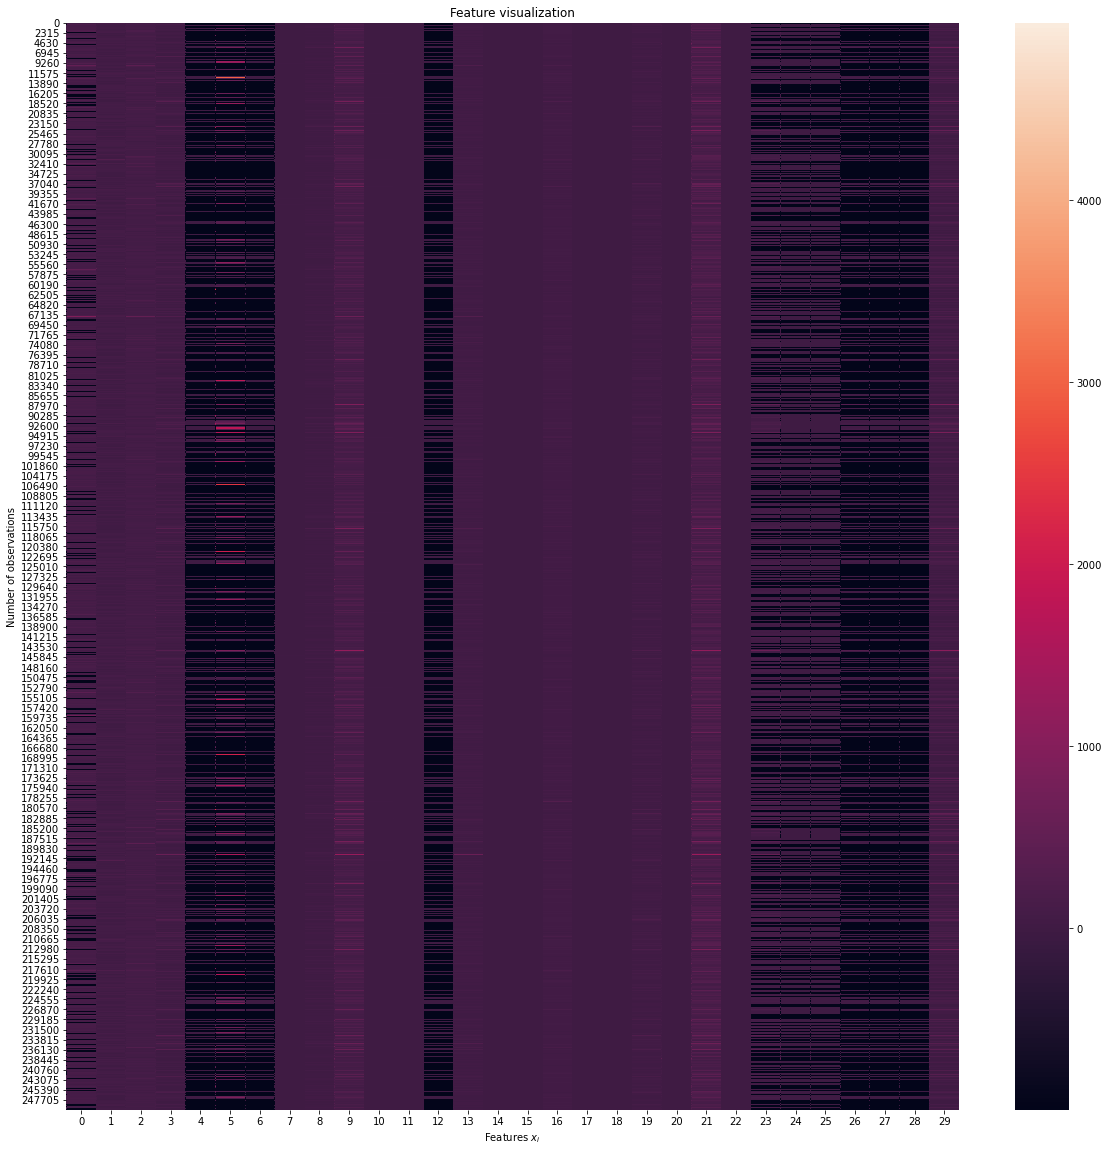

In [8]:
plt.figure(figsize=(20,20))

sns.heatmap(tx)

plt.xlabel('Features $x_{i}$')
plt.ylabel('Number of observations')
plt.title('Feature visualization')

Display data distribution for each feature

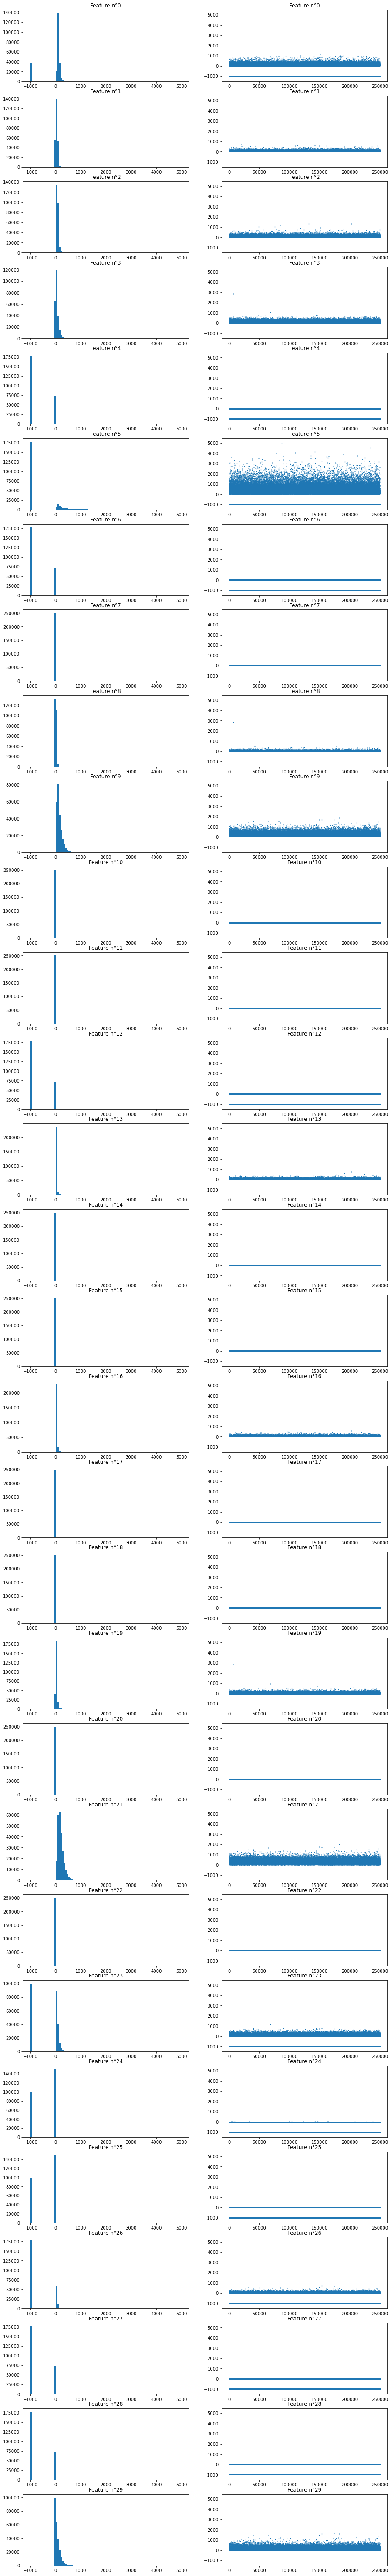

In [9]:
fig, ax = plt.subplots(30,2,figsize=(15,108))
obser = range(tx.shape[0])
for i in range(tx.shape[1]):  
    ax[i][0].hist(tx[:,i],bins=100, range=[np.min(tx),np.max(tx)])
    ax[i][0].title.set_text('Feature n°{}' .format(i))
    
    ax[i][1].scatter(obser,tx[:,i],s=1)
    ax[i][1].title.set_text('Feature n°{}' .format(i))
    ax[i][1].set_ylim(np.min(tx)-500,np.max(tx)+500)

Check similarity between features in several ways

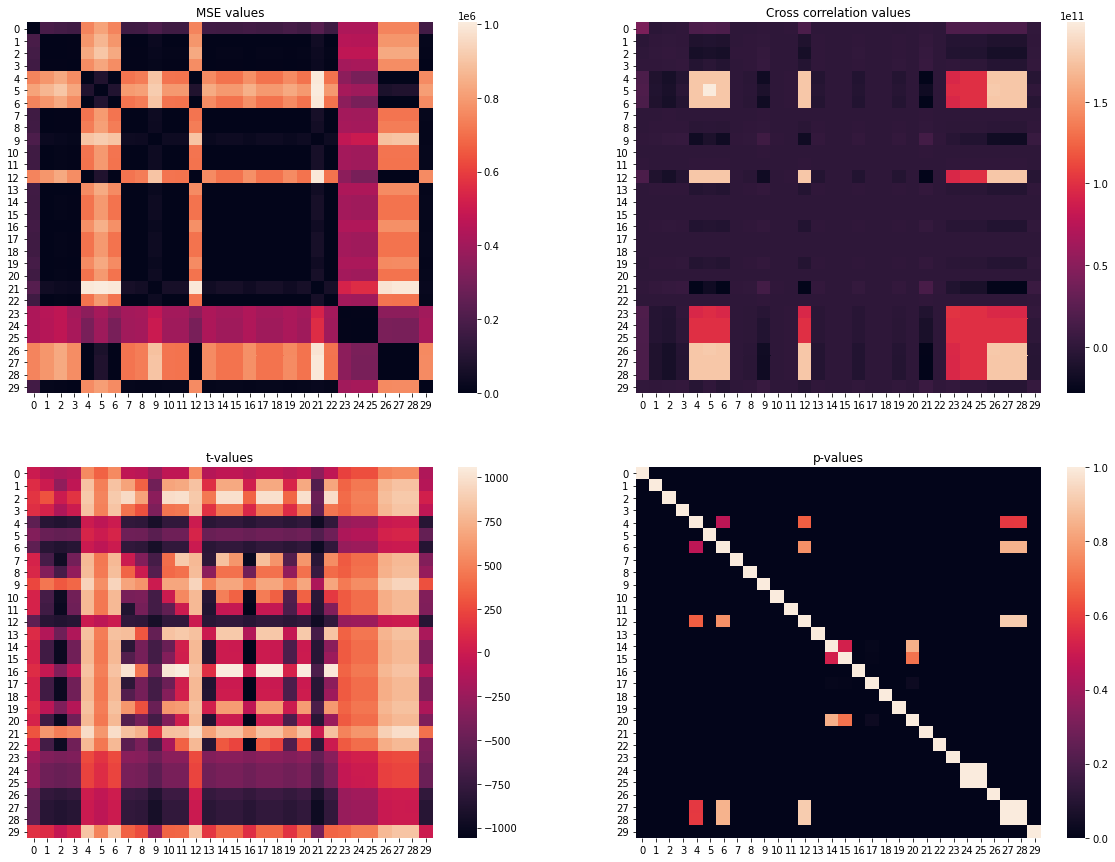

In [11]:
#MSE, t-test and p-value
import scipy
mse_all = np.zeros([tx.shape[1],tx.shape[1]])
tvalues_all = np.zeros([tx.shape[1],tx.shape[1]])
pvalues_all = np.zeros([tx.shape[1],tx.shape[1]])
corr_all = np.zeros([tx.shape[1],tx.shape[1]])

for i in range(tx.shape[1]):
    ti = tx[:,i]
    for j in range(tx.shape[1]):
        tj = tx[:,j]
        mse = np.square(np.subtract(ti,tj)).mean()        
        tvalue,pvalue = scipy.stats.ttest_ind_from_stats(np.mean(ti), np.std(ti), len(ti), np.mean(tj), np.std(tj), len(tj))
        corr=np.correlate(ti, tj, mode='valid')
        mse_all[i,j] = mse
        tvalues_all[i,j] = tvalue
        pvalues_all[i,j] = pvalue
        corr_all[i,j] = corr
        
fig, ax = plt.subplots(2,2,figsize=(20,15))

sns.heatmap(mse_all,ax=ax[0][0])
ax[0][0].title.set_text('MSE values')

sns.heatmap(corr_all,ax=ax[0][1])
ax[0][1].title.set_text('Cross correlation values')

sns.heatmap(tvalues_all,ax=ax[1][0])
ax[1][0].title.set_text('t-values')

sns.heatmap(pvalues_all,ax=ax[1][1])
ax[1][1].title.set_text('p-values')

## 2) Feature Processing

In [15]:
#just code to check -999 abundance in the rows/columns
M,N = tx.shape
row_list = []
col_list = []
for i in range(M):
    if np.sum((tx[i]==-999.0)) > 1:
        row_list.append(i)
for j in range(N):
    if np.sum((tx[:,j]==-999.0)) > 3:
        col_list.append(i)
print(len(row_list), len(col_list))

177457 11


In [16]:
#delete features
"""M,N = tx.shape
indices = []
for i in range(M):
    if np.sum((tx[i]==-999.0)) > 1:
        indices.append(i)
tx = np.delete(tx, indices, 0)
y = np.delete(y, indices, 0)
ids = np.delete(ids, indices, 0)"""

'M,N = tx.shape\nindices = []\nfor i in range(M):\n    if np.sum((tx[i]==-999.0)) > 1:\n        indices.append(i)\ntx = np.delete(tx, indices, 0)\ny = np.delete(y, indices, 0)\nids = np.delete(ids, indices, 0)'

In [17]:
#normalize features?
"""
for j in range(tx.shape[1]):
    col = tx[:,j]
    tx[:,j] = (col-col.min())/(col.max()-col.min())"""

'\nfor j in range(tx.shape[1]):\n    col = tx[:,j]\n    tx[:,j] = (col-col.min())/(col.max()-col.min())'

## 3) Implement ML-methods

In [12]:
#rmse calculation
def compute_error(y, tx, w):
    e = y-np.matmul(tx, w)
    return e

def compute_loss(y, tx, w):
    N = len(y)
    e = compute_error(y, tx, w)
    mse = 1/(2*N)*np.sum(e**2)
    rmse = np.sqrt(2*mse)
    return rmse

In [13]:
#gradient descent
def compute_gradient(y, tx, w):
    N = len(y)
    e = compute_error(y, tx, w)
    grad = (-1/N)*np.matmul(tx.T,e)
    return grad

def least_squares_GD(y, tx, initial_w, max_iters, gamma):
    w = initial_w
    for n_iter in range(max_iters):
        grad = compute_gradient(y, tx, w)
        w -= gamma*grad
    loss = compute_loss(y, tx, w)
    print("Gradient Descent: loss is ", loss)
    return w, loss

In [14]:
#stochastic gradient descent
def compute_stoch_gradient(y, tx, w):
    N = len(y)
    e = compute_error(y, tx, w)
    grad = (-1/N)*np.matmul(tx.T,e)
    return grad

def least_squares_SGD(y, tx, initial_w, max_iters, gamma,  batch_size = 1):
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for ymini, txmini in batch_iter(y, tx, batch_size, num_batches=1, shuffle=True):
            grad = compute_gradient(ymini, txmini, w)
            w -= gamma*grad
    loss = compute_loss(ymini, txmini, w)
    print("Stochastic Gradient Descent: loss is ", loss)
    return w, loss

In [15]:
#least squares
def least_squares(y, tx):
    N = len(y)
    w = np.linalg.solve(np.matmul(tx.T, tx), np.matmul(tx.T,y))
    loss = compute_loss(y, tx, w)
    print("Least squares: loss is ", loss)
    return w, loss

In [16]:
#ridge regression
def ridge_regression(y, phi, lambda_):
    N=len(phi)
    lambda_acc=2*N*lambda_
    kwad = np.matmul(phi.T,phi)
    w = np.linalg.solve(kwad+lambda_acc*np.eye(kwad.shape[0]),np.matmul(phi.T,y))
    loss = compute_loss(y, phi, w)
    print("Ridge regression: loss is ", loss)
    return w, loss

In [17]:
#logistic regression
def logistic_regression(y, tx, initial_w, max_iters, gamma):
    
    return w, loss

In [18]:
#regularized logistic regression
def reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma):
    
    return w, loss



## 4) Analyze methods and tune hyperparameters

In [19]:
#polynomial feature augmentation
def build_poly(x, degree):
    #prof flammarion said it is possible, but i would wait a bit with doing it
    return x
"""def build_poly(x, degree):
    if degree == 0:
        return x
    else:
        N = len(x)
        phi = np.zeros((N,degree+1))
        for i in range(degree+1):
            phi[:, i] = x**i
        return phi"""

"""def build_poly_2d(x, degree):
    N,M = x.shape
    phi = np.zeros((N,30*(degree+1)))
    for i in range(M):
        col = x[:,i]
        exp = build_poly(col, degree)
        phi[:, i*(degree+1):(i+1)*(degree)] = exp
    return phi
x = np.array([[1,2,3],[4,5,6]])
print(build_poly_2d(x, 3))"""

'def build_poly_2d(x, degree):\n    N,M = x.shape\n    phi = np.zeros((N,30*(degree+1)))\n    for i in range(M):\n        col = x[:,i]\n        exp = build_poly(col, degree)\n        phi[:, i*(degree+1):(i+1)*(degree)] = exp\n    return phi\nx = np.array([[1,2,3],[4,5,6]])\nprint(build_poly_2d(x, 3))'

In [20]:
#cross validation
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)


def cross_validation(y, x, k_indices, k, degree, w):
    x_train_0, y_train_0 = x[k_indices[:k].ravel()], y[k_indices[:k].ravel()]
    x_train_1, y_train_1 = x[k_indices[k+1:].ravel()], y[k_indices[k+1:].ravel()]
    if x_train_0.shape[0] == 0:
        x_train = x_train_1
        y_train = y_train_1
    if x_train_1.shape[0] == 0:
        x_train = x_train_0
        y_train = y_train_0
    else:
        x_train, y_train = np.concatenate((x_train_0, x_train_1), axis=0), np.concatenate((y_train_0, y_train_1), axis=0)
    
    x_test, y_test = x[k_indices[k]], y[k_indices[k]]
    # get k'th subgroup in test, others in train

    
    phi_train = build_poly(x_train, degree)
    phi_test = build_poly(x_test, degree)
    
    
    loss_tr = compute_loss(y_train, phi_train, w)
    loss_te = compute_loss(y_test, phi_test, w)
    
    return loss_tr, loss_te

In [21]:
def apply_cross_validation(y, x, k_indices, k_fold, degree, w):
    loss_tr = []
    loss_te = []
    for k in range(k_fold):
        loss_train, loss_test = cross_validation(y, x, k_indices, k, degree, w)
        loss_tr.append(loss_train)
        loss_te.append(loss_test)
    rmse_tr = np.mean(np.array(loss_tr))
    rmse_te = np.mean(np.array(loss_te))
    return rmse_tr, rmse_te

In [22]:
initial_w = np.ones((tx.shape[1]))
max_iters = 100
gamma = 0.0000000001
lambda_ = 0.4

In [23]:
#calculate weights and rmse values
weights_ls, loss_ls = least_squares(y, tx)
initial_w = weights_ls

weights_gd, loss_gd = least_squares_GD(y, tx, initial_w, max_iters, gamma)
weights_sgd, loss_sgd = least_squares_SGD(y, tx, initial_w, max_iters, gamma)
weights_rr, loss_rr = ridge_regression(y, tx, lambda_)

rmse_list = []
rmse_list.extend([loss_ls, loss_gd, loss_sgd, loss_rr])

Least squares: loss is  0.8242412383241573
Gradient Descent: loss is  0.8242412383241573
Stochastic Gradient Descent: loss is  0.18805914100798304
Ridge regression: loss is  0.8377083826284639


In [24]:
#apply cross validation
k_fold = 4
degree = 0
print('weights',weights_ls.shape)

k_indices = build_k_indices(y, k_fold, SEED)
apply_cross_validation(y, tx, k_indices, k_fold, degree, weights_ls)

weights (30,)


(0.8242486558816584, 0.8242480195250055)

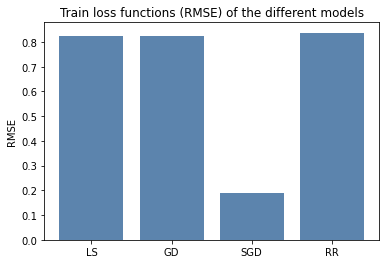

In [25]:
barWidth = 0.3
bars = ('LS', 'GD', 'SGD', 'RR')
y_pos = np.arange(len(bars))

# Create bars
height = rmse_list
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.8))

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title('Train loss functions (RMSE) of the different models')
plt.ylabel('RMSE')

# Show graphic
plt.show()

In [26]:
y_pred_ls = predict_labels(weights_ls, tx_test)
y_pred_gd = predict_labels(weights_gd, tx_test)
y_pred_sgd = predict_labels(weights_sgd, tx_test)
y_pred_rr = predict_labels(weights_rr, tx_test)


In [27]:
indices = build_k_indices(y, 4, SEED)
rmse_tr_ls, rmse_te_ls = apply_cross_validation(y, tx, indices, 4, 8, weights_ls)

ValueError: operands could not be broadcast together with shapes (568238,) (250000,) 

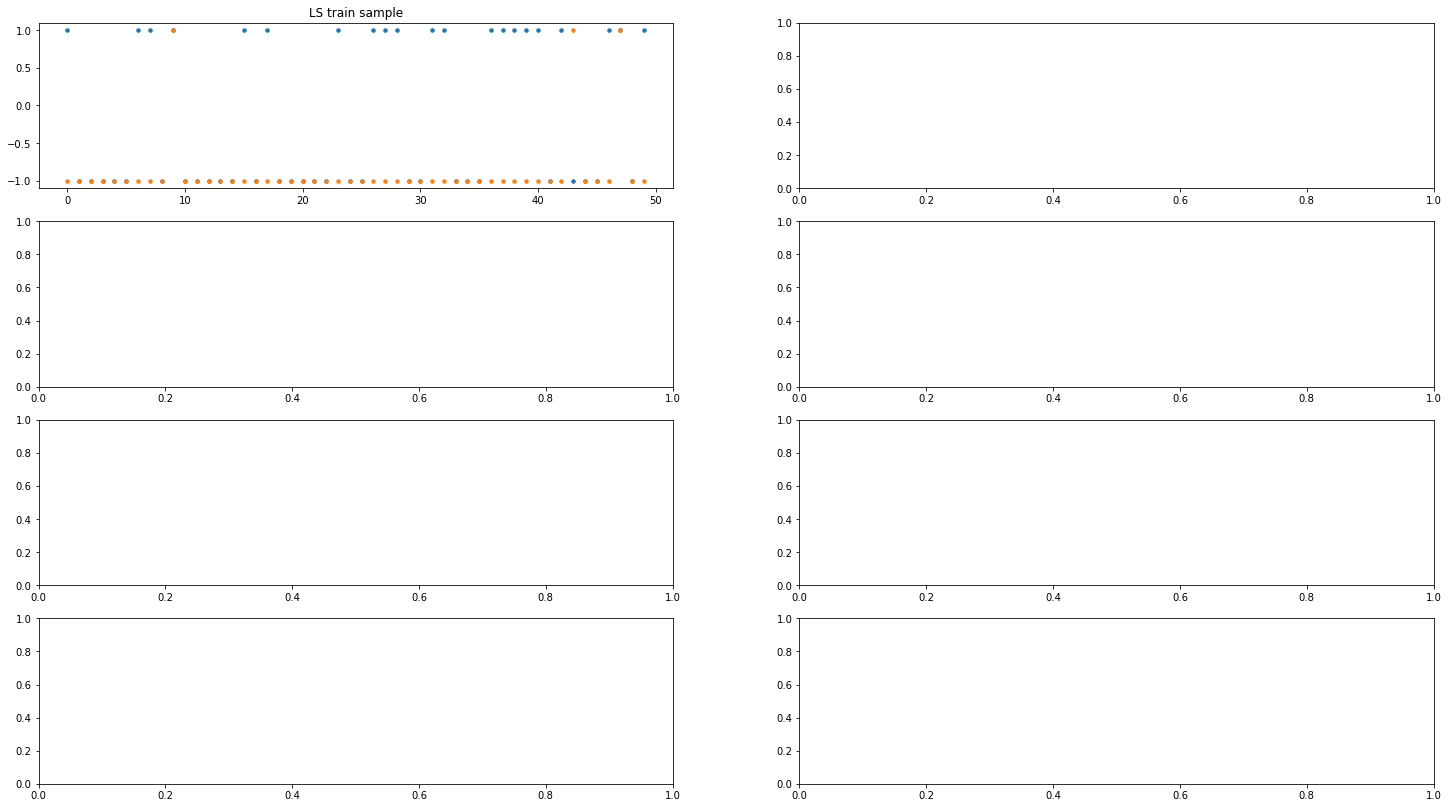

In [28]:
first_obser = range(50)
fig, ax = plt.subplots(4,2,figsize=(25,14))

# TRAIN OBSERVATIONS
ax[0][0].scatter(first_obser,y[0:50],s=12)
ax[0][0].scatter(first_obser,y_pred_ls[0:50],s=12)
ax[0][0].title.set_text('LS train sample')
lse_correct = np.sum((y_pred_ls+y !=0)*1)*100/tx.shape[0] #percentage of correctly defined points
ax[0][0].text(2,0.3,str(lse_correct)+' % correct train predictions')
ax[0][0].text(2,0,str(loss_train[0])+' train RMSE')


ax[3][0].scatter(first_obser,y[0:50],s=12)
ax[3][0].scatter(first_obser,f_rr[0:50],s=12)
ax[3][0].title.set_text('RR train sample')
rr_correct = np.sum((y_pred_rr+y !=0)*1)*100/tx.shape[0] #percentage of correctly defined points
ax[3][0].text(2,0.3,str(rr_correct)+' % correct train predictions')
ax[3][0].text(2,0,str(loss_rr)+' train RMSE')




# TEST OBSERVATIONS
#THIS IS NOT CORRECT, BECAUSE WE DONT KNOW THE TEST LABELS

ax[0][1].scatter(first_obser,y_test[0:50],s=12)
ax[0][1].scatter(first_obser,y_pred_lse[0:50],s=12)
ax[0][1].title.set_text('LS test sample')
lse_correct = np.sum((y_pred_ls+y_test !=0)*1)*100/tx.shape[0] #percentage of correctly defined points
ax[0][1].text(2,0.3,str(lse_correct)+' % correct test predictions')
ax[0][1].text(2,0,str(loss_ls)+' test RMSE')


ax[3][1].scatter(first_obser,y_test[0:50],s=12)
ax[3][1].scatter(first_obser,y_pred_rr[0:50],s=12)
ax[3][1].title.set_text('RR test sample')
rr_correct = np.sum((y_pred_rr+y_test !=0)*1)*100/tx.shape[0] #percentage of correctly defined points
ax[3][1].text(2,0.3,str(rr_correct)+' % correct test predictions')
ax[3][1].text(2,0,str(loss_test[3])+' test RMSE')

plt.show()


## 5) Choose the best model 
## Generate predictions and save ouput in csv format for submission:

In [ ]:
OUTPUT_PATH = r'C:\Users\Tomas\GitHub\ML_course\projects\project1\predictions_sgd.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights_gd, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)